<a href="https://colab.research.google.com/github/bwillow1222/ds4002MI3P1/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/bwillow1222/ds4002MI3P1/main/DATA/Scored_Data.csv'
data = pd.read_csv(url)

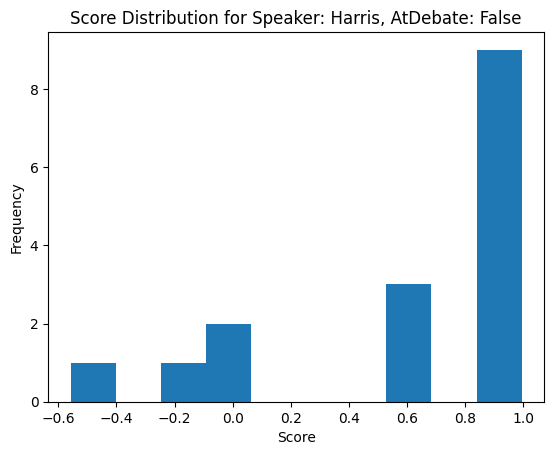

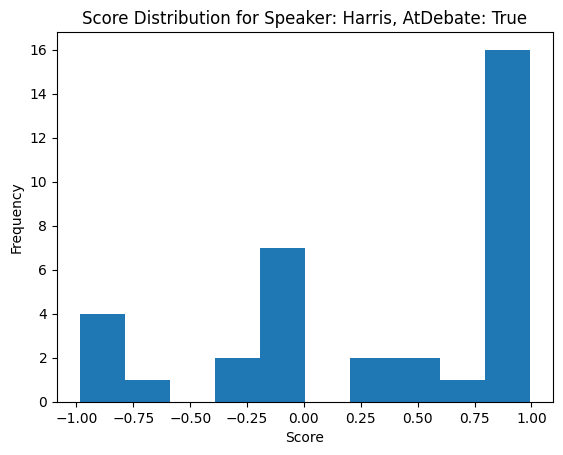

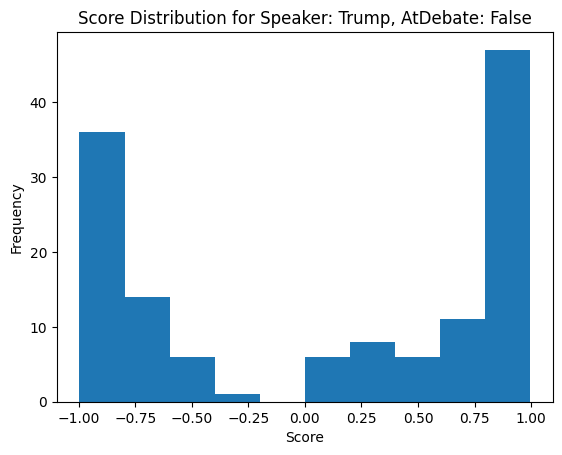

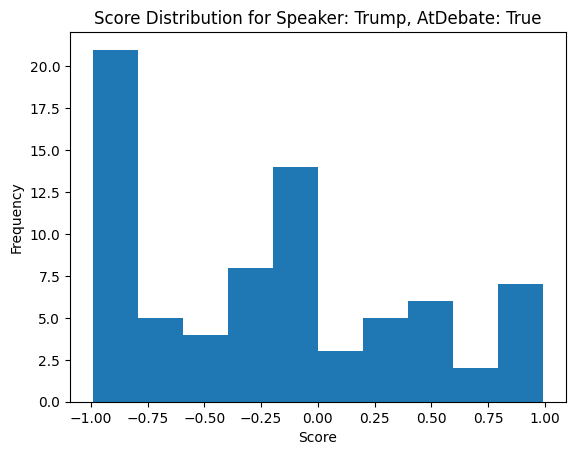

In [ ]:
# Group the data by Speaker and AtDebate
for (speaker, at_debate), group in data.groupby(['Speaker', 'AtDebate']):
    # Create a histogram of Scores for the current group
    plt.figure()
    plt.hist(group['Score'], bins=10)  # Adjust bins as needed
    plt.title(f'Score Distribution for Speaker: {speaker}, AtDebate: {at_debate}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


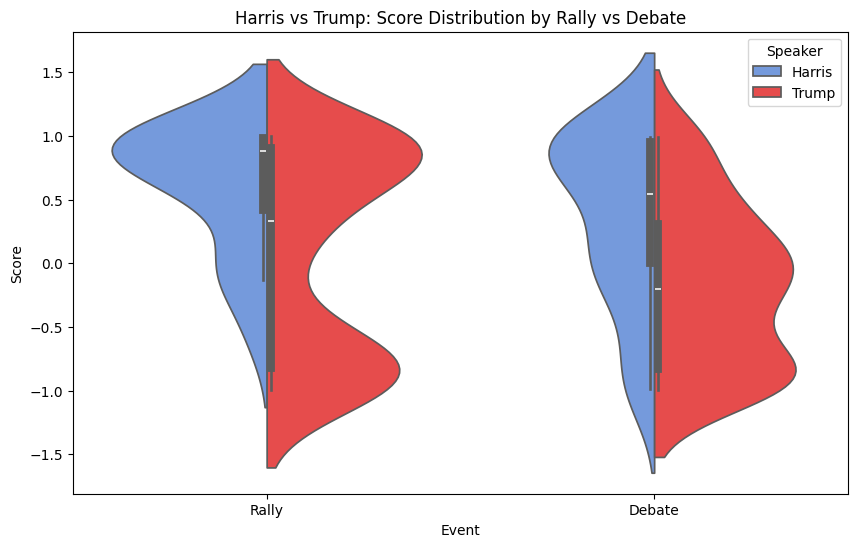

In [ ]:
# Filter the data for Harris and Trump only
harris_vs_trump = data[data['Speaker'].isin(['Harris', 'Trump'])]

# Define more visually appealing colors
custom_palette = {"Harris": "#6495ED", "Trump": "#ff3333"}  # Light blue for Harris, warm pink-red for Trump

# Create a violin plot for Harris vs Trump, split by AtDebate (True = debate, False = rally)
plt.figure(figsize=(10, 6))

# Generate the violin plot with specified hue order and custom colors
sns.violinplot(x='AtDebate', y='Score', hue='Speaker', data=harris_vs_trump, split=True,
               palette=custom_palette, hue_order=['Harris', 'Trump'])

# Customize the plot
plt.title('Harris vs Trump: Score Distribution by Rally vs Debate')
plt.xticks([0, 1], ['Rally', 'Debate'])
plt.xlabel('Event')
plt.ylabel('Score')

# Show the plot
plt.show()


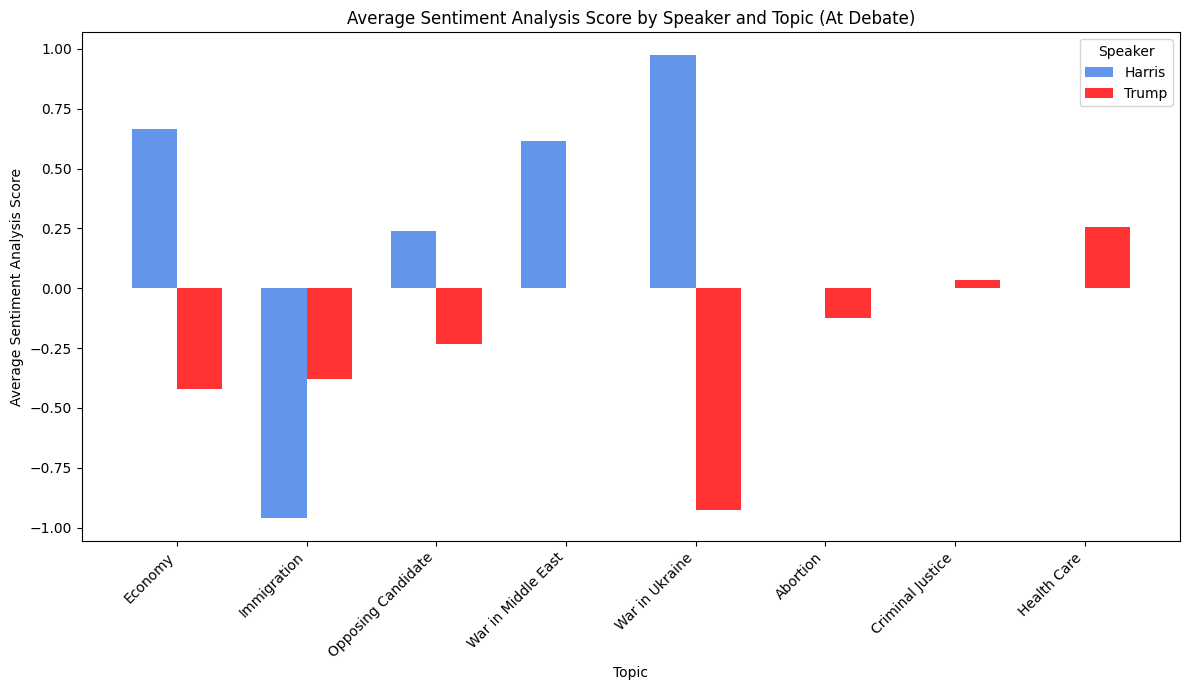

In [ ]:
# Filter data to only include debate comments
debate_data = data[data['AtDebate'] == True]

# Group the data by 'Speaker' and 'Topic' and calculate the mean sentiment score
grouped_data_speaker_topic = debate_data.groupby(['Speaker', 'Topic'])['Score'].mean().reset_index()

# Define colors for each speaker
colors = {"Harris": "#6495ED", "Trump": "#ff3333"}

# Get the unique topics and speakers
topics = grouped_data_speaker_topic['Topic'].unique()
speakers = grouped_data_speaker_topic['Speaker'].unique()

# Create an empty list to track the x positions
x = np.arange(len(topics))

# Bar width
bar_width = 0.35

# Initialize the plot
plt.figure(figsize=(12, 7))

# Plot each speaker's bar with their respective colors
for i, speaker in enumerate(speakers):
    # Filter the data for each speaker
    subset = grouped_data_speaker_topic[grouped_data_speaker_topic['Speaker'] == speaker]

    # Align the topics to match the x positions, filling missing topics with 0
    subset_scores = [subset[subset['Topic'] == topic]['Score'].values[0] if topic in subset['Topic'].values else 0 for topic in topics]

    # Plot the bars with adjusted positions and speaker-specific colors
    plt.bar(x + i * bar_width, subset_scores, bar_width, label=speaker, color=colors[speaker])

# Add labels and formatting
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Analysis Score')
plt.title('Average Sentiment Analysis Score by Speaker and Topic (At Debate)')
plt.xticks(x + bar_width / 2, topics, rotation=45, ha='right')
plt.legend(title='Speaker')

plt.tight_layout()

# Show the plot
plt.show()


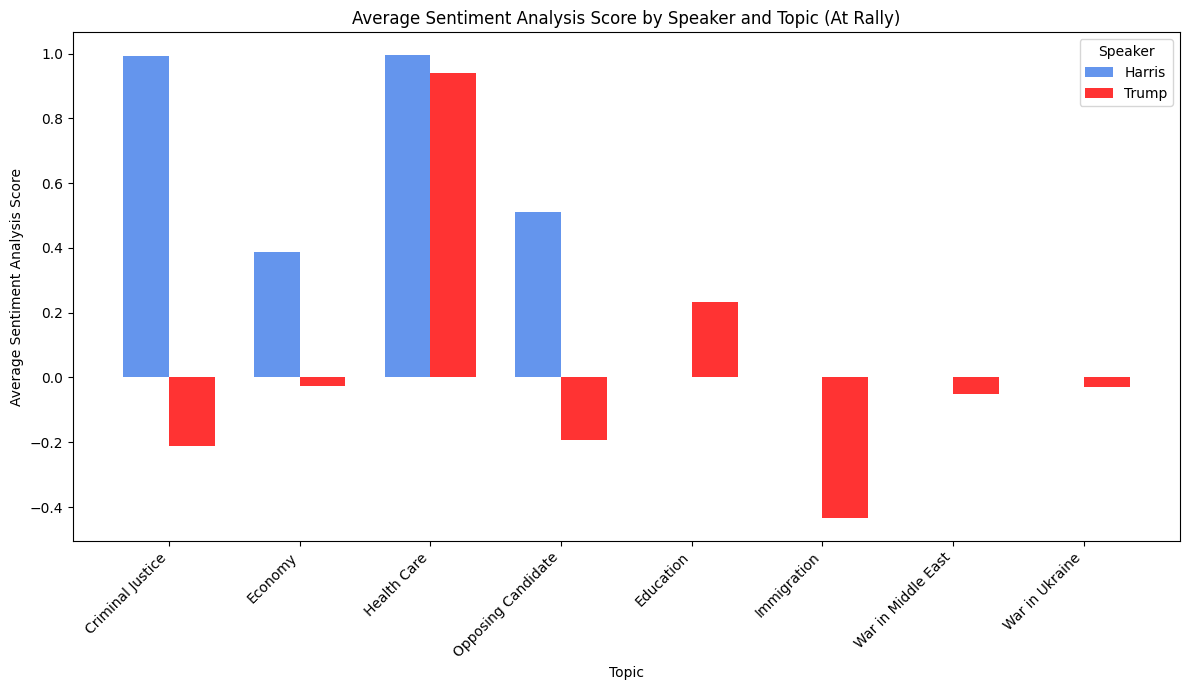

In [ ]:
# Filter data to only include debate comments
rally_data = data[data['AtDebate'] == False]

# Group the data by 'Speaker' and 'Topic' and calculate the mean sentiment score
grouped_data_speaker_topic = rally_data.groupby(['Speaker', 'Topic'])['Score'].mean().reset_index()

# Define colors for each speaker
colors = {"Harris": "#6495ED", "Trump": "#ff3333"}

# Get the unique topics and speakers
topics = grouped_data_speaker_topic['Topic'].unique()
speakers = grouped_data_speaker_topic['Speaker'].unique()

# Create an empty list to track the x positions
x = np.arange(len(topics))

# Bar width
bar_width = 0.35

# Initialize the plot
plt.figure(figsize=(12, 7))

# Plot each speaker's bar with their respective colors
for i, speaker in enumerate(speakers):
    # Filter the data for each speaker
    subset = grouped_data_speaker_topic[grouped_data_speaker_topic['Speaker'] == speaker]

    # Align the topics to match the x positions, filling missing topics with 0
    subset_scores = [subset[subset['Topic'] == topic]['Score'].values[0] if topic in subset['Topic'].values else 0 for topic in topics]

    # Plot the bars with adjusted positions and speaker-specific colors
    plt.bar(x + i * bar_width, subset_scores, bar_width, label=speaker, color=colors[speaker])

# Add labels and formatting
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Analysis Score')
plt.title('Average Sentiment Analysis Score by Speaker and Topic (At Rally)')
plt.xticks(x + bar_width / 2, topics, rotation=45, ha='right')
plt.legend(title='Speaker')

plt.tight_layout()

# Show the plot
plt.show()
